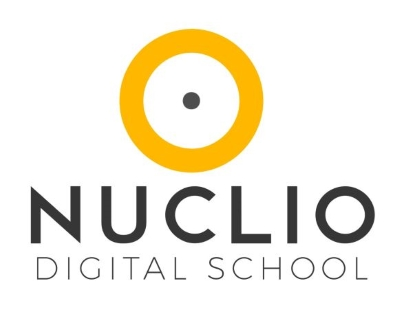

### Nome:

# Análise de Dados de Vendas

## Objetivo

Este assignment tem como objetivo explorar e analisar dados de vendas de uma loja fictícia usando a biblioteca Pandas em Python.

## DataSource

Utilize o arquivo "sales_data.csv" para realizar as operações a seguir.

## Requisitos

# 1. **Função que exibe características do DataFrame (10 pts):**

Crie uma função que carregue o arquivo "sales_data.csv" para um DataFrame e exiba informações gerais sobre o DataFrame, como:

* número de linhas **(2pts)**
* número de colunas **(2pts)**
* tipos de dados **(2pts)**
* nome das colunas e linhas **(2pts)**
* primeiras e últimas 10 linhas **(2pts)**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ret_df_prt_st(path: str, info:bool = False, dtypes:bool = True) -> pd.DataFrame:
    """
    inputs:
        path: str ,
        info: bool,
        dtypes(1): bool
    return:
        pd.DataFrame
    """
    try:
        #carregando df
        df = pd.read_csv(path)
        #numero de linhas e colunas
        linhas,colunas = df.shape
        print(f'o DataFrame tem  {linhas} linhas') 
        print(f'o DataFrame tem {colunas} colunas ')
        print('\n')
        #tipos de dados e nome das colunas
        if info:
            dtypes = False
            print('tipo de cada coluna:')
            print(df.info())
            print('\n')
        if dtypes:
            print('tipo de cada coluna:')
            print('[COLUNA] - [TIPO]')
            for column in df.columns:
                print('{column} - {dtype}'.format(column=column, dtype=df[column].dtype))
            print('\n')
        #primeiras e ultimas  10 linhas
        print('primeiras 10 linhas')
        print(df.head(10))
        print('ultimas 10 linhas')
        print(df.tail(10))
        return df
    except FileNotFoundError as fnf_error:
        print(fnf_error)
        print(f"Explicação: não podemos carregar '{path}' ")

In [3]:
ret_df_prt_st.__annotations__

{'path': str,
 'info': bool,
 'dtypes': bool,
 'return': pandas.core.frame.DataFrame}

In [4]:
df = ret_df_prt_st('sales_data.csv', info= False )

o DataFrame tem  365 linhas
o DataFrame tem 7 colunas 


tipo de cada coluna:
[COLUNA] - [TIPO]
Data - object
Produto - object
Categoria - object
Preço - float64
Quantidade - int64
Stock - int64
Canal de Vendas - object


primeiras 10 linhas
         Data      Produto    Categoria  Preço  Quantidade  Stock  \
0  2023-01-01  Produto C-E  Eletrónicos  24.51           6     17   
1  2023-01-02  Produto A-A    Alimentos  26.89           5     31   
2  2023-01-03  Produto A-R       Roupas  19.50           9     46   
3  2023-01-04  Produto E-R       Roupas  12.41           2     14   
4  2023-01-05  Produto D-E  Eletrónicos  61.56          10      0   
5  2023-01-06  Produto B-R       Roupas  75.28           4     26   
6  2023-01-07  Produto D-R       Roupas  81.62           6     10   
7  2023-01-08  Produto E-R       Roupas  80.05           6     29   
8  2023-01-09  Produto D-E  Eletrónicos  91.04           9     43   
9  2023-01-10  Produto F-A    Alimentos  61.43           1     31   

In [5]:
df

,Data,Produto,Categoria,Preço,Quantidade,Stock,Canal de Vendas
0,2023-01-01,Produto C-E,Eletrónicos,24.51,6,17,Offline
1,2023-01-02,Produto A-A,Alimentos,26.89,5,31,Offline
2,2023-01-03,Produto A-R,Roupas,19.50,9,46,Online
3,2023-01-04,Produto E-R,Roupas,12.41,2,14,Offline
4,2023-01-05,Produto D-E,Eletrónicos,61.56,10,0,Offline
...,...,...,...,...,...,...,...
360,2023-12-27,Produto E-A,Alimentos,98.09,1,17,Offline
361,2023-12-28,Produto A-A,Alimentos,94.02,2,27,Online
362,2023-12-29,Produto C-A,Alimentos,39.21,4,45,Online
363,2023-12-30,Produto D-R,Roupas,97.62,4,45,Online


In [6]:
type(df['Preço'].dtype)

numpy.dtypes.Float64DType

# 2. **Vendas mensais totais (10 pts):**

Calcule e exiba as vendas totais para cada mês presente no DataFrame.

In [7]:
df['MES'] = pd.to_datetime(df['Data'], format = '%Y-%m-%d').dt.month
df['ANO'] = pd.to_datetime(df['Data'], format = '%Y-%m-%d').dt.year
df['Valor Total Venda'] = df['Quantidade'] * df['Preço'] 

In [8]:
df

,Data,Produto,Categoria,Preço,Quantidade,Stock,Canal de Vendas,MES,ANO,Valor Total Venda
0,2023-01-01,Produto C-E,Eletrónicos,24.51,6,17,Offline,1,2023,147.06
1,2023-01-02,Produto A-A,Alimentos,26.89,5,31,Offline,1,2023,134.45
2,2023-01-03,Produto A-R,Roupas,19.50,9,46,Online,1,2023,175.50
3,2023-01-04,Produto E-R,Roupas,12.41,2,14,Offline,1,2023,24.82
4,2023-01-05,Produto D-E,Eletrónicos,61.56,10,0,Offline,1,2023,615.60
...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,Produto E-A,Alimentos,98.09,1,17,Offline,12,2023,98.09
361,2023-12-28,Produto A-A,Alimentos,94.02,2,27,Online,12,2023,188.04
362,2023-12-29,Produto C-A,Alimentos,39.21,4,45,Online,12,2023,156.84
363,2023-12-30,Produto D-R,Roupas,97.62,4,45,Online,12,2023,390.48


### valor das vendas totais por mes

In [9]:
pd.DataFrame(df.groupby('MES')['Valor Total Venda'].sum()).reset_index()

,MES,Valor Total Venda
0,1,10979.32
1,2,10553.77
2,3,10897.14
3,4,9454.86
4,5,9097.95
5,6,9234.04
6,7,10770.94
7,8,9007.97
8,9,8921.44
9,10,9342.38


### quantidade das vendas totais por mes

In [10]:
pd.DataFrame(df.groupby('MES')['Quantidade'].sum()).reset_index()

,MES,Quantidade
0,1,168
1,2,181
2,3,180
3,4,175
4,5,168
5,6,178
6,7,173
7,8,159
8,9,175
9,10,161


# 3. **Produtos mais vendidos (10 pts):**

Identifique os produtos mais vendidos e exiba seus nomes e quantidades vendidas.

In [11]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False).reset_index()

,Produto,Quantidade
0,Produto E-A,157
1,Produto D-E,156
2,Produto D-A,139
3,Produto E-R,139
4,Produto B-R,135
5,Produto D-R,135
6,Produto B-E,130
7,Produto F-E,127
8,Produto A-R,116
9,Produto B-A,116


# 4. **Média de preço por categoria de produto (10 pts):**

Calcule a média de preço para cada categoria de produto e exiba os resultados.

In [12]:
df.groupby('Categoria')['Preço'].mean().sort_values(ascending = False).reset_index()

,Categoria,Preço
0,Alimentos,57.621102
1,Eletrónicos,55.305126
2,Roupas,54.434375


# 5. **Total de vendas por canal de vendas (10 pts):**

Calcule o total de vendas para cada canal de vendas e exiba os resultados.

### Valor total de vendas por canal

In [13]:
df.groupby('Canal de Vendas')['Valor Total Venda'].sum().reset_index()

,Canal de Vendas,Valor Total Venda
0,Offline,58639.39
1,Online,55969.75


### quantidade total de vendas por canal

In [14]:
df.groupby('Canal de Vendas')['Quantidade'].sum().reset_index()

,Canal de Vendas,Quantidade
0,Offline,1076
1,Online,954


6. **Análise de vendas por ano (10 pts):**

Analise as vendas por ano e exiba os resultados em gráficos ou tabelas informativas.

### Quantidade de vendas por ano 

In [15]:
df.groupby('ANO')['Quantidade'].sum().reset_index()

,ANO,Quantidade
0,2023,2030


### Valor de vendas por ano 

In [16]:
df.groupby('ANO')['Valor Total Venda'].sum().reset_index()

,ANO,Valor Total Venda
0,2023,114609.14


# 7. **Remoção de produtos com stock esgotado (5 pts):**

Remova os produtos que têm stock igual a zero do DataFrame.

In [17]:
df = df[df['Stock'] != 0]

In [18]:
df['Stock'].value_counts().sort_index().head(3)

Stock
1     3
2    10
3    10
Name: count, dtype: int64

# 8. **Margem de lucro por produto (10 pts):**

Calcule a margem de lucro para cada produto e exiba os resultados.

In [19]:
df_margem = df.groupby('Produto')['Valor Total Venda'].sum().reset_index()
df_margem['Margem Produto'] = df_margem['Valor Total Venda']/df['Valor Total Venda'].sum()
df_margem

,Produto,Valor Total Venda,Margem Produto
0,Produto A-A,7231.31,0.064555
1,Produto A-E,3198.90,0.028557
2,Produto A-R,5551.69,0.049560
3,Produto B-A,7016.40,0.062636
4,Produto B-E,7473.95,0.066721
5,Produto B-R,7751.15,0.069195
6,Produto C-A,5478.36,0.048906
7,Produto C-E,4742.85,0.042340
8,Produto C-R,5820.00,0.051956
9,Produto D-A,7262.08,0.064829


# 9. **Percentagem de vendas online vs. offline (5 pts):**

Calcule a percentagem de vendas online e offline em relação ao total de vendas.

### total de vendas por valor

In [20]:
df_g_tipo = df.groupby('Canal de Vendas')['Valor Total Venda'].sum().reset_index()
df_g_tipo['PCT Vendas VALOR'] = df_g_tipo['Valor Total Venda']*100/ df_g_tipo['Valor Total Venda'].sum()
df_g_tipo

,Canal de Vendas,Valor Total Venda,PCT Vendas VALOR
0,Offline,56874.14,50.7721
1,Online,55144.35,49.2279


### total de vendas por quantidade

In [21]:
df_g_tipo = df.groupby('Canal de Vendas')['Quantidade'].sum().reset_index()
df_g_tipo['PCT Vendas QTD'] = df_g_tipo['Quantidade']*100/ df_g_tipo['Quantidade'].sum()
df_g_tipo

,Canal de Vendas,Quantidade,PCT Vendas QTD
0,Offline,1050,52.896725
1,Online,935,47.103275


# 10. **Análise de Preços ao Longo do Tempo (20 pts)**

Realize uma análise dos preços dos produtos ao longo do tempo para identificar tendências e variações nos preços. Pode seguir as seguintes etapas:


## Analise por total de produtos

<p> A pergunta pode ser entendida por 2 formas separadas, primeiro agrupando e tirando a média dos produtos e segundo agrupando por produto e tirando a média </p>
<p> segue a primeira analise</p>

## **a.** Agrupe os dados por mês e calcule a média dos preços de todos os produtos em cada mês. **(5pts)**



In [22]:
df.groupby('MES')['Preço'].mean().reset_index()

,MES,Preço
0,1,60.128966
1,2,57.880741
2,3,57.552581
3,4,50.395714
4,5,57.377097
5,6,53.698667
6,7,57.887419
7,8,56.485161
8,9,52.144667
9,10,59.039355


## **b.** Plote um gráfico de linha que mostre a média dos preços ao longo do tempo, com o eixo x representando os meses e o eixo y representando a média dos preços. **(5pts)**


In [23]:
 df.groupby('MES')['Preço'].mean().index.to_list()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

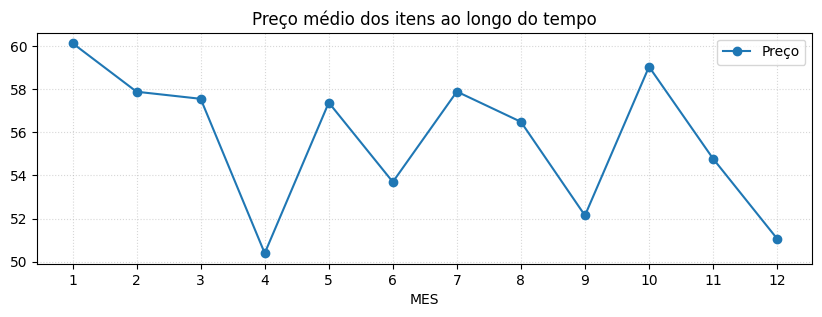

<Figure size 640x480 with 0 Axes>

In [24]:
df.groupby('MES')['Preço'].mean().reset_index().plot.line( x = 'MES', y = 'Preço',
                                                          marker = 'o',
                                                          xticks =  df.groupby('MES')['Preço'].mean().index.to_list(),
                                                          figsize = (10,3))
plt.title('Preço médio dos itens ao longo do tempo')
plt.grid(axis = 'x', linestyle = ':', alpha = 0.5)
plt.grid(axis = 'y', linestyle = ':', alpha = 0.5)
plt.show()
plt.tight_layout()

## **c.** Identifique os meses em que houve as maiores variações de preço (maior aumento e maior queda). **(5pts)**


In [25]:
df_a = df.groupby('MES')['Preço'].mean().reset_index()
df_a['Media'] = df_a['Preço'].mean()
df_a['var'] = df_a['Preço']- df_a['Preço'].mean()
df_a['PCT_CHANGE'] = df_a['Preço'].pct_change()*100
df_a

,MES,Preço,Media,var,PCT_CHANGE
0,1,60.128966,55.703108,4.425857,NaN
1,2,57.880741,55.703108,2.177633,-3.739005
2,3,57.552581,55.703108,1.849472,-0.566959
3,4,50.395714,55.703108,-5.307394,-12.435353
4,5,57.377097,55.703108,1.673989,13.853127
5,6,53.698667,55.703108,-2.004441,-6.410973
6,7,57.887419,55.703108,2.184311,7.800478
7,8,56.485161,55.703108,0.782053,-2.422388
8,9,52.144667,55.703108,-3.558441,-7.684310
9,10,59.039355,55.703108,3.336247,13.222231


### Analise Mes a mes

<Figure size 1000x1000 with 0 Axes>

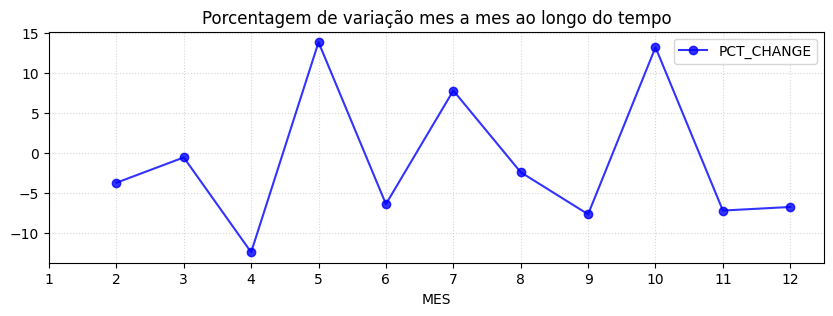

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize = (10,10))
df_a.plot.line( x = 'MES',
               y = ['PCT_CHANGE'],
               color = 'blue',
               marker = 'o',
               alpha = 0.8,
               xticks =  df.groupby('MES')['Preço'].mean().index.to_list(),
                                                          figsize = (10,3))
plt.title('Porcentagem de variação mes a mes ao longo do tempo')
plt.grid(axis = 'x', linestyle = ':', alpha = 0.5)
plt.grid(axis = 'y', linestyle = ':', alpha = 0.5)
plt.show()
plt.tight_layout()


In [27]:
print("""
Com relação ao mes anterior , comparando mes a mes
o mes com maior variação negativa foi o mes {mes_neg}
Já mes com maior variação positiva foi o mes {mes_pos}""".format(mes_neg = df_a[df_a['PCT_CHANGE'] == df_a['PCT_CHANGE'].min()]['MES'].values[0],
                                                                 mes_pos = df_a[df_a['PCT_CHANGE'] == df_a['PCT_CHANGE'].max()]['MES'].values[0]))


Com relação ao mes anterior , comparando mes a mes
o mes com maior variação negativa foi o mes 4
Já mes com maior variação positiva foi o mes 5


### Analise de amplitude a partir da média dos valores

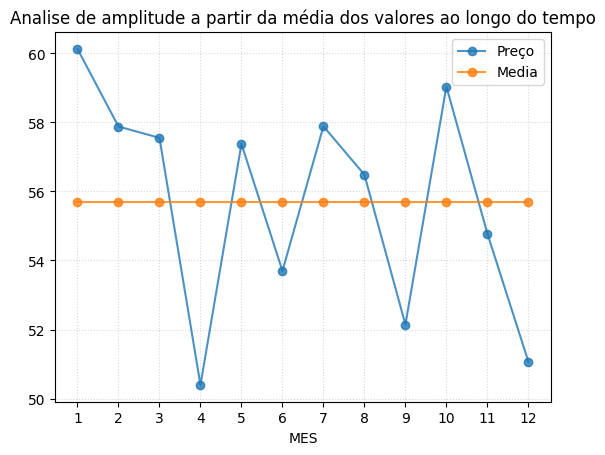

<Figure size 640x480 with 0 Axes>

In [28]:
df_a.plot.line( x = 'MES', y = ['Preço', 'Media'],  

               marker = 'o',
               alpha = 0.8,
               xticks =  df.groupby('MES')['Preço'].mean().index.to_list())
plt.title('Analise de amplitude a partir da média dos valores ao longo do tempo')
plt.grid(axis = 'x', linestyle = ':', alpha = 0.5)
plt.grid(axis = 'y', linestyle = ':', alpha = 0.5)
plt.show()
plt.tight_layout()

In [29]:
print("""
Com relação ao mes anterior , comparando mes a mes
o mes com maior variação negativa foi o mes {mes_neg}
Já mes com maior variação positiva foi o mes {mes_pos}""".format(mes_neg = df_a[df_a['var'] == df_a['var'].min()]['MES'].values[0],
                                                                 mes_pos = df_a[df_a['var'] == df_a['var'].max()]['MES'].values[0]))


Com relação ao mes anterior , comparando mes a mes
o mes com maior variação negativa foi o mes 4
Já mes com maior variação positiva foi o mes 1


## **d.** Escreva uma breve análise dos resultados, destacando qualquer padrão ou tendência observada nos preços dos produtos ao longo do ano. **(5pts)**

In [30]:
df[['MES','Preço']].corr()

,MES,Preço
MES,1.000000,-0.049752
Preço,-0.049752,1.000000


Analisando os gráficos e também observando a correlação , não existe qualquer padrão ou tendencia nesses meses observados

## Analise por produto por mes
<p>abaixo esta a analise agrupando mes a mes e extraindo o valor médio dos produtos</p>

### **a.** Agrupe os dados por mês e calcule a média dos preços de todos os produtos em cada mês. **(5pts)**
### **b.** Plote um gráfico de linha que mostre a média dos preços ao longo do tempo, com o eixo x representando os meses e o eixo y representando a média dos preços. **(5pts)**
### **c.** Identifique os meses em que houve as maiores variações de preço (maior aumento e maior queda). **(5pts)**
### **d.** Escreva uma breve análise dos resultados, destacando qualquer padrão ou tendência observada nos preços dos produtos ao longo do ano. **(5pts)**

In [31]:
df_pm = df.groupby(['MES','Produto'])['Preço'].mean().reset_index()

In [32]:
df_pm

,MES,Produto,Preço
0,1,Produto A-A,26.890000
1,1,Produto A-R,53.423333
2,1,Produto B-E,77.147500
3,1,Produto B-R,75.280000
4,1,Produto C-A,86.320000
...,...,...,...
167,12,Produto D-R,61.270000
168,12,Produto E-A,40.500000
169,12,Produto F-A,38.375000
170,12,Produto F-E,64.940000


In [33]:
type(tuple([1,2]))

tuple

In [34]:
def ret_stat_plot_line(Produto:str, df:pd.DataFrame = df_pm)-> tuple: 
    plt.figure(figsize = (10,2))
    #medias
    sns.lineplot(x = 'MES', y = 'Preço', data = df[df['Produto'] == Produto][['MES','Produto', 'Preço']], label = 'Preço médio')
    plt.hlines(y = df[df['Produto'] == Produto]['Preço'].mean(),
               xmin =df[df['Produto'] == Produto]['MES'].min(),
               xmax =df[df['Produto'] == Produto]['MES'].max(), colors = 'red', linestyles = '--', label = 'Média')
    plt.title(f'Preço - {Produto}')  
    
    plt.legend()
    print('a- média anual do produto:')
    print('média anual do {produto} é {media:.2f} \n'.format(produto = Produto, media = df[df['Produto'] == Produto]['Preço'].mean()))
    
        # analise de variacao cumulativa no ano
    df = df_pm
    df_a = df[df['Produto'] == Produto].copy()
    df_a['pct_change'] = df_a['Preço'].pct_change()
    df_a['cumprod'] = (df_a['pct_change']+1).cumprod()
    cumprod = df_a['cumprod'].tail(1).values[0]
    
    
    
    
    
    #min/max variação mes a mes
    min_var_mm = df_a['pct_change'].min()
    min_mes_mm = df_a[df_a['pct_change'] == min_var_mm]['MES'].values[0]
    max_var_mm = df_a['pct_change'].max()
    max_mes_mm = df_a[df_a['pct_change'] == max_var_mm]['MES'].values[0]
    print('c- máxima e mínima variação do valir médio do produto mes a mes no ano :')
    print(f'mínima variação pct de um mes para outro foi de {(1+min_var_mm)*100:.2f} % no mes {min_mes_mm-1} para o {min_mes_mm}')
    print(f'máxima variação pct de um mes para outro foi de {(1+max_var_mm)*100:.2f} % no mes {max_mes_mm-1} para o {max_mes_mm}  \n')
    
    print('d- Análise:')
    if cumprod < 0.8:
        print(f'a variação cumulativa do {Produto}  é {cumprod:.2f}')
        print(f'forte tendencia de variação NEGATIVA do preço do {Produto} no ano')
    elif (cumprod > 0.8) and (cumprod < 0.95):
        print(f'a variação cumulativa do {Produto} é {cumprod:.2f}')
        print(f'pouca tendencia de variação NEGATIVA do preço do {Produto} no ano')
    elif (cumprod > 0.95) and (cumprod < 1.05):
        print(f'a variação cumulativa do {Produto} é {cumprod:.2f}')
        print(f'pouca tendencia de variação do preço do {Produto} no ano')
    elif (cumprod > 1.05) and (cumprod < 1.2):
        print(f'a variação cumulativa do {Produto} é {cumprod:.2f}')
        print(f'pouca tendencia de variação POSITIVA do preço do {Produto} no ano')
    elif (cumprod > 1.2) :
        print(f'a variação cumulativa do {Produto} é {cumprod:.2f}')
        print(f'forte tendencia de variação POSITIVA do preço do {Produto} no ano')
    
    
    #regplot
    sns.regplot(x="MES", y="Preço", data = df[df['Produto'] == Produto], label = 'Linear Reg')
    
    plt.show()
    return (Produto, min_var_mm, max_var_mm, cumprod)
    

Produto A-A
a- média anual do produto:
média anual do Produto A-A é 60.78 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 72.70 % no mes 2 para o 3
máxima variação pct de um mes para outro foi de 304.48 % no mes 1 para o 2  

d- Análise:
a variação cumulativa do Produto A-A é 3.02
forte tendencia de variação POSITIVA do preço do Produto A-A no ano


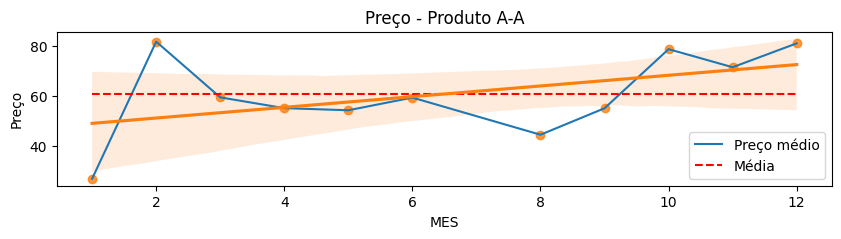

Produto A-R
a- média anual do produto:
média anual do Produto A-R é 51.88 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 69.37 % no mes 8 para o 9
máxima variação pct de um mes para outro foi de 176.14 % no mes 9 para o 10  

d- Análise:
a variação cumulativa do Produto A-R é 1.04
pouca tendencia de variação do preço do Produto A-R no ano


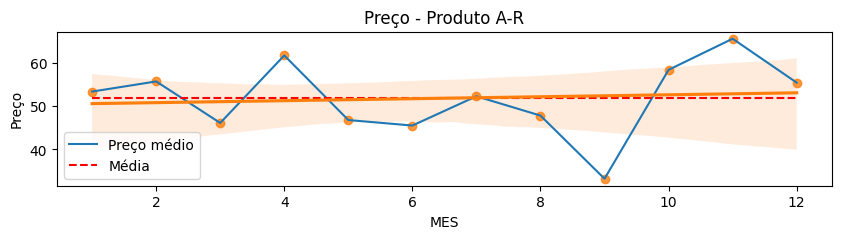

Produto B-E
a- média anual do produto:
média anual do Produto B-E é 56.11 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 30.59 % no mes 8 para o 9
máxima variação pct de um mes para outro foi de 298.06 % no mes 9 para o 10  

d- Análise:
a variação cumulativa do Produto B-E  é 0.30
forte tendencia de variação NEGATIVA do preço do Produto B-E no ano


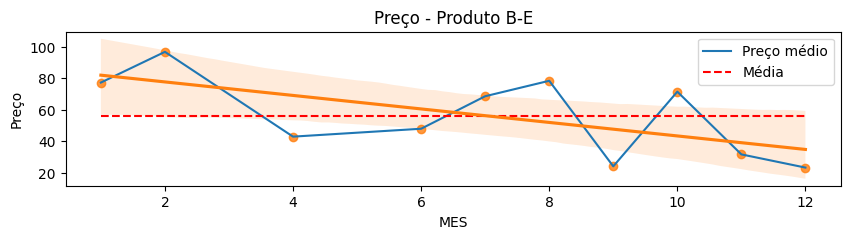

Produto B-R
a- média anual do produto:
média anual do Produto B-R é 55.30 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 35.30 % no mes 7 para o 8
máxima variação pct de um mes para outro foi de 532.59 % no mes 9 para o 10  

d- Análise:
a variação cumulativa do Produto B-R  é 0.49
forte tendencia de variação NEGATIVA do preço do Produto B-R no ano


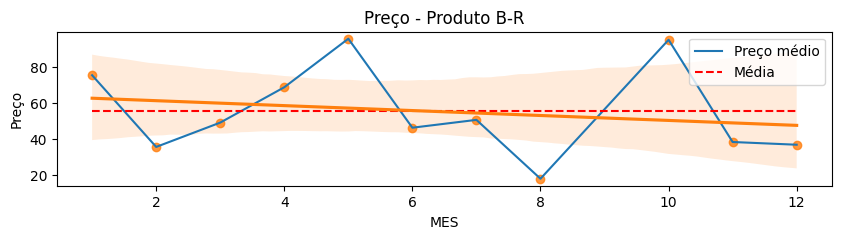

Produto C-A
a- média anual do produto:
média anual do Produto C-A é 52.46 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 15.04 % no mes 2 para o 3
máxima variação pct de um mes para outro foi de 314.23 % no mes 4 para o 5  

d- Análise:
a variação cumulativa do Produto C-A  é 0.49
forte tendencia de variação NEGATIVA do preço do Produto C-A no ano


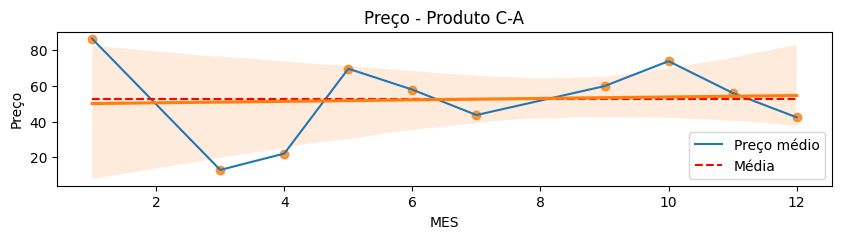

Produto C-E
a- média anual do produto:
média anual do Produto C-E é 46.57 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 54.73 % no mes 6 para o 7
máxima variação pct de um mes para outro foi de 178.05 % no mes 7 para o 8  

d- Análise:
a variação cumulativa do Produto C-E é 1.41
forte tendencia de variação POSITIVA do preço do Produto C-E no ano


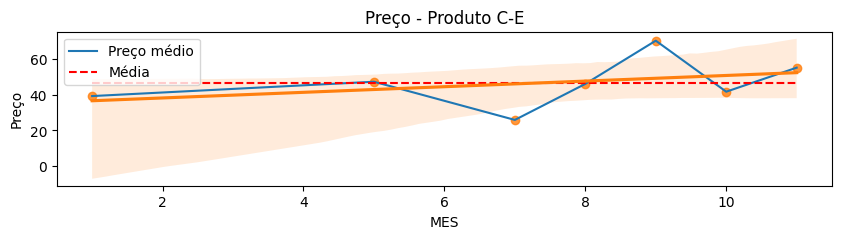

Produto C-R
a- média anual do produto:
média anual do Produto C-R é 67.17 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 67.86 % no mes 6 para o 7
máxima variação pct de um mes para outro foi de 153.73 % no mes 3 para o 4  

d- Análise:
a variação cumulativa do Produto C-R é 1.36
forte tendencia de variação POSITIVA do preço do Produto C-R no ano


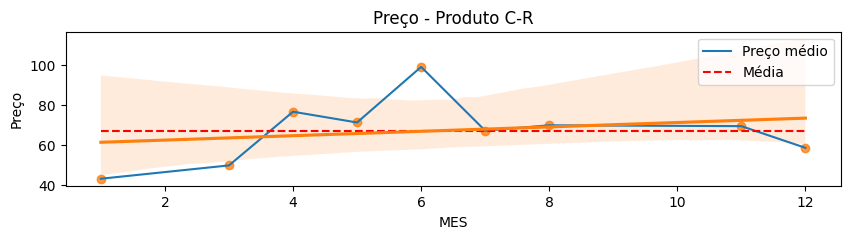

Produto D-E
a- média anual do produto:
média anual do Produto D-E é 57.97 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 50.78 % no mes 8 para o 9
máxima variação pct de um mes para outro foi de 216.62 % no mes 6 para o 7  

d- Análise:
a variação cumulativa do Produto D-E  é 0.72
forte tendencia de variação NEGATIVA do preço do Produto D-E no ano


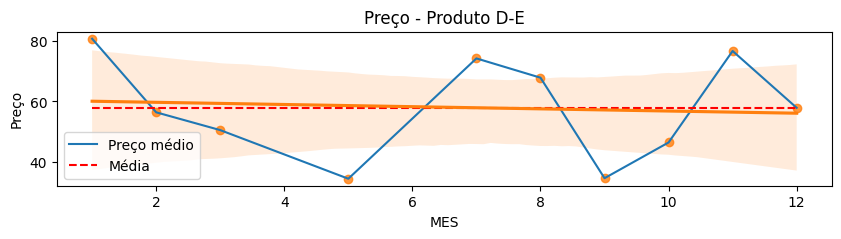

Produto D-R
a- média anual do produto:
média anual do Produto D-R é 57.58 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 31.30 % no mes 6 para o 7
máxima variação pct de um mes para outro foi de 309.32 % no mes 7 para o 8  

d- Análise:
a variação cumulativa do Produto D-R  é 0.75
forte tendencia de variação NEGATIVA do preço do Produto D-R no ano


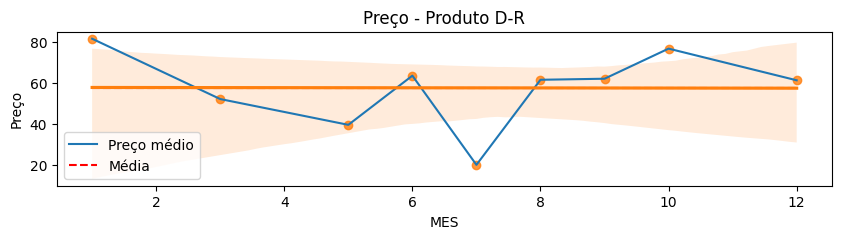

Produto E-A
a- média anual do produto:
média anual do Produto E-A é 54.32 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 45.79 % no mes 5 para o 6
máxima variação pct de um mes para outro foi de 266.89 % no mes 1 para o 2  

d- Análise:
a variação cumulativa do Produto E-A é 1.58
forte tendencia de variação POSITIVA do preço do Produto E-A no ano


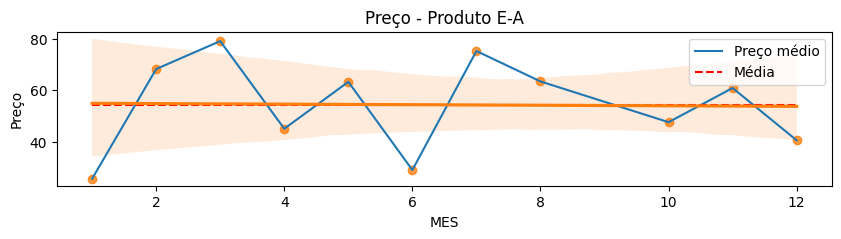

Produto E-E
a- média anual do produto:
média anual do Produto E-E é 51.41 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 60.61 % no mes 1 para o 2
máxima variação pct de um mes para outro foi de 246.34 % no mes 6 para o 7  

d- Análise:
a variação cumulativa do Produto E-E é 1.33
forte tendencia de variação POSITIVA do preço do Produto E-E no ano


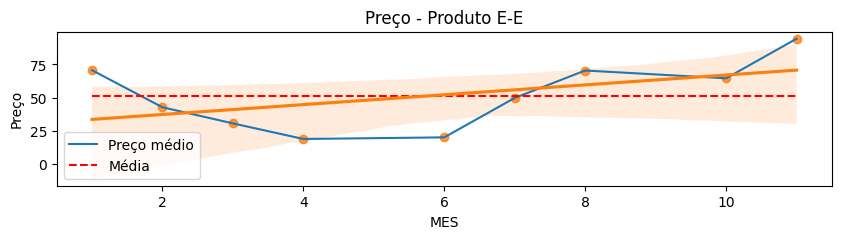

Produto E-R
a- média anual do produto:
média anual do Produto E-R é 43.82 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 36.42 % no mes 10 para o 11
máxima variação pct de um mes para outro foi de 158.39 % no mes 4 para o 5  

d- Análise:
a variação cumulativa do Produto E-R  é 0.50
forte tendencia de variação NEGATIVA do preço do Produto E-R no ano


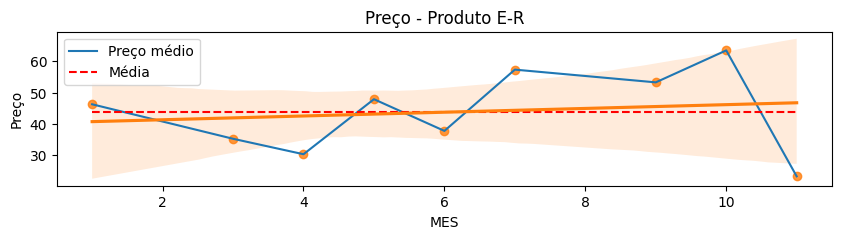

Produto F-A
a- média anual do produto:
média anual do Produto F-A é 56.87 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 39.60 % no mes 5 para o 6
máxima variação pct de um mes para outro foi de 197.53 % no mes 10 para o 11  

d- Análise:
a variação cumulativa do Produto F-A  é 0.54
forte tendencia de variação NEGATIVA do preço do Produto F-A no ano


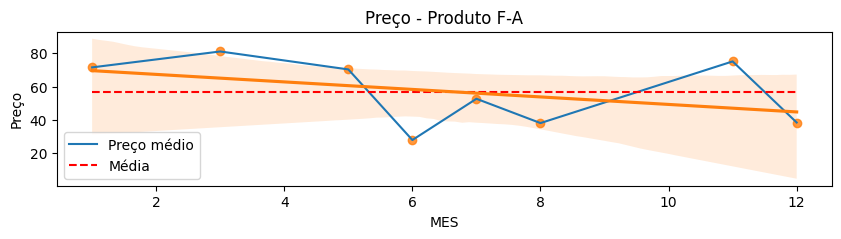

Produto A-E
a- média anual do produto:
média anual do Produto A-E é 61.27 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 72.50 % no mes 7 para o 8
máxima variação pct de um mes para outro foi de 149.60 % no mes 11 para o 12  

d- Análise:
a variação cumulativa do Produto A-E é 1.15
pouca tendencia de variação POSITIVA do preço do Produto A-E no ano


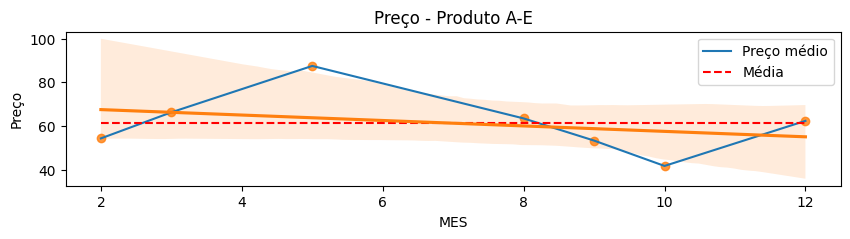

Produto B-A
a- média anual do produto:
média anual do Produto B-A é 63.99 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 23.47 % no mes 7 para o 8
máxima variação pct de um mes para outro foi de 458.60 % no mes 8 para o 9  

d- Análise:
a variação cumulativa do Produto B-A é 2.05
forte tendencia de variação POSITIVA do preço do Produto B-A no ano


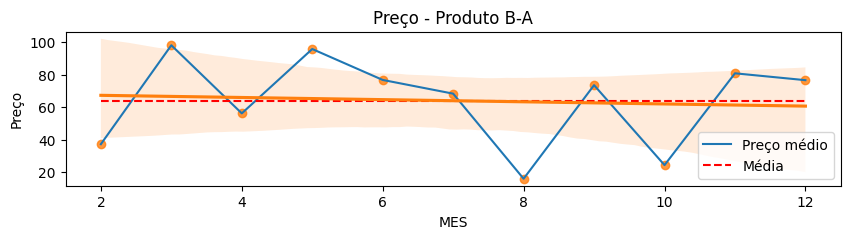

Produto D-A
a- média anual do produto:
média anual do Produto D-A é 51.27 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 37.83 % no mes 7 para o 8
máxima variação pct de um mes para outro foi de 175.71 % no mes 10 para o 11  

d- Análise:
a variação cumulativa do Produto D-A  é 0.64
forte tendencia de variação NEGATIVA do preço do Produto D-A no ano


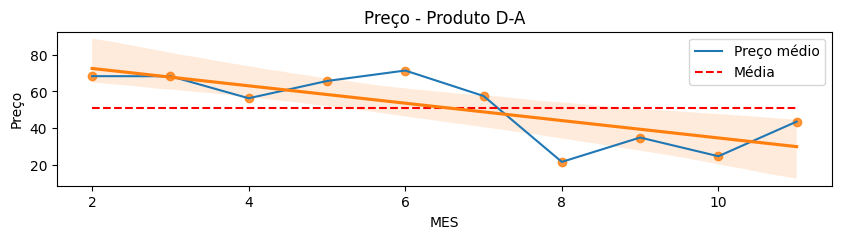

Produto F-E
a- média anual do produto:
média anual do Produto F-E é 52.74 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 41.35 % no mes 10 para o 11
máxima variação pct de um mes para outro foi de 269.23 % no mes 2 para o 3  

d- Análise:
a variação cumulativa do Produto F-E é 2.37
forte tendencia de variação POSITIVA do preço do Produto F-E no ano


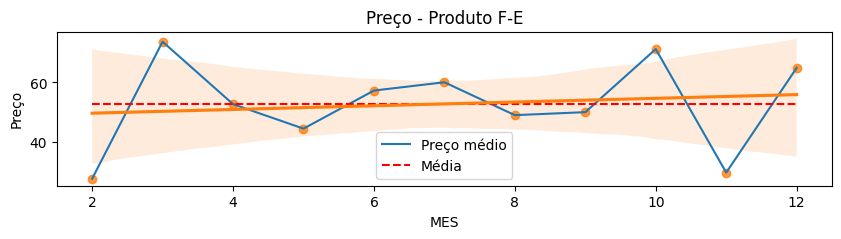

Produto F-R
a- média anual do produto:
média anual do Produto F-R é 57.24 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 63.93 % no mes 5 para o 6
máxima variação pct de um mes para outro foi de 190.14 % no mes 3 para o 4  

d- Análise:
a variação cumulativa do Produto F-R é 0.80
pouca tendencia de variação NEGATIVA do preço do Produto F-R no ano


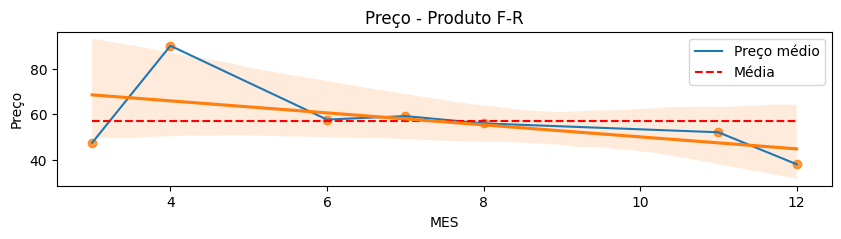

In [35]:
lst_prod_names = []
lst_min_var_prod_mm = []
lst_max_var_prod_mm = []
lst_cumprod = []
for produto in df_pm['Produto'].unique():
    print(produto)
    (prod, min_var_prod_mm, max_var_prod_mm,cumprod )=ret_stat_plot_line(produto)
    lst_prod_names.append(prod)
    lst_min_var_prod_mm.append(min_var_prod_mm)
    lst_max_var_prod_mm.append(max_var_prod_mm)
    lst_cumprod.append(cumprod)
dict_a = {'Produto':lst_prod_names,
         'Min_var_mes_a_mes':lst_min_var_prod_mm,
         'Max_var_mes_a_mes':lst_max_var_prod_mm,
         'cum_prod':lst_cumprod}    
df_p_a = pd.DataFrame(dict_a)
    

# produto com maior variaçao de preco anual

In [36]:
df_p_a[df_p_a['cum_prod'] ==df_p_a['cum_prod'].max()]

,Produto,Min_var_mes_a_mes,Max_var_mes_a_mes,cum_prod
0,Produto A-A,-0.273038,2.044812,3.018966


a- média anual do produto:
média anual do Produto A-A é 60.78 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 72.70 % no mes 2 para o 3
máxima variação pct de um mes para outro foi de 304.48 % no mes 1 para o 2  

d- Análise:
a variação cumulativa do Produto A-A é 3.02
forte tendencia de variação POSITIVA do preço do Produto A-A no ano


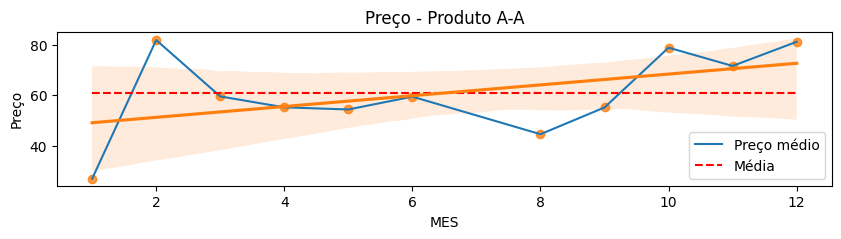

('Produto A-A', -0.2730381679389312, 2.0448121978430644, 3.018966158423206)

In [37]:
ret_stat_plot_line(df_p_a[df_p_a['cum_prod'] ==df_p_a['cum_prod'].max()]['Produto'].values[0])

# produto com menor variaçao de preco anual

In [38]:
df_p_a[df_p_a['cum_prod'] ==df_p_a['cum_prod'].min()]

,Produto,Min_var_mes_a_mes,Max_var_mes_a_mes,cum_prod
2,Produto B-E,-0.694149,1.980576,0.299945


a- média anual do produto:
média anual do Produto B-E é 56.11 

c- máxima e mínima variação do valir médio do produto mes a mes no ano :
mínima variação pct de um mes para outro foi de 30.59 % no mes 8 para o 9
máxima variação pct de um mes para outro foi de 298.06 % no mes 9 para o 10  

d- Análise:
a variação cumulativa do Produto B-E  é 0.30
forte tendencia de variação NEGATIVA do preço do Produto B-E no ano


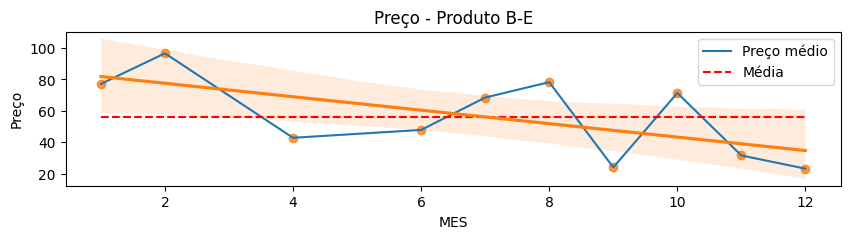

('Produto B-E', -0.6941487096499446, 1.9805764411027567, 0.2999449107229657)

In [39]:
ret_stat_plot_line(df_p_a[df_p_a['cum_prod'] ==df_p_a['cum_prod'].min()]['Produto'].values[0])

```python
import pandas as pd

url="https://raw.githubusercontent.com/saracouto1318/Nuclio---M1-Data-Science-Tools-/master/sales_data.csv"
df = pd.read_csv(url)

display(df)
```